# Tips dataset analysis

Description: Fundamentals of Data Analysis - assignment project, GMIT 2019. See README.md for more background info.

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Date of creation: 23-09-2019

This Notebook should be read in conjunction with the corresponding README.md file at the assignment repository at GitHub: <https://github.com/andkoc001/Tips_dataset_analysis/>.

___

## Introduction

### The data

It is a common custom to offer some small extra money - a tip - to the staff of a restaurant on top of the bill after a satisfactory service received. Although the tips are voluntary, and the amount of the tips is not (usually) stated, by convention it is often advised to leave as the tip several percent of the total bill for the meal and service. 

The _tips dataset_ is a representation of tips given in a restaurant. The dataset in question is a record (allegedly real and true) of tips along with total bills and some other particulars of a restaurant customers collated by a waiter working in the restaurant for several weeks. 

The data is organised in a form of an array, where the dataset attributes (aka features) are organised in columns, and the observations (aka instances) - in rows. The dataset consists of several data categories describing tips received in connection to circumstances, such as day of the week, total bill, etc. The data set includes 244 data observations.

The _tips dataset_ is also integrated with the [Seaborn](https://seaborn.pydata.org/) package, an external Python package for data visualisation, used also in this analysis. This dataset will be used in the subsequent analysis. The dataset, can be also obtained as a .csv file from, for example, [here](http://vincentarelbundock.github.io/Rdatasets/datasets.html).  

### Hypothesis

The dataset provokes to ask the following question: **Is there a linear relationship between _total bill_ and _amount of tip_?**  
Below we will try to find evidences either supporting or the opposite this hypothesis.

### The Analysis
This Notebook presents my analysis and interpretation of the _tips dataset_. This is done through the following:
1. descriptive statistics of the raw data,
2. graphical representation of the data - plots,
3. inference of the implicit information by application of selected tools, methods and algorithms used in data analytics.


___
## Setting up the environment

### Importing additional packages  

In [76]:
# numerical calculations libraries, assigning aliases
import numpy as np
import pandas as pd

# plotting and data visualisation libraries, assigning aliases
import matplotlib.pyplot as plt
import seaborn as sns

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

### Loading the data set

Assigning the data from _Seaborn_ package to variable `tips`.

In [5]:
# Loading the data set
tips = sns.load_dataset("tips")

### The dataset basic properties and its integrity check 

Let's first see what is the shape of the data set, that is how many raws and how many columns are there.

In [ ]:
tips.shape # number of rows and columns respectively

Let's check datatype for each column, using `data.dtypes` method.

In [ ]:
tips.dtypes

Now, let's see what are the unique values occur in each non-numeric (categorical) column, using Pandas' method `unique()`.

In [ ]:
# Adapted from https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/.
#List unique values in the _day_ column
print("Values occuring in column 'sex':", tips.sex.unique(), "\n")
print("Values occuring in column 'smoler':", tips.smoker.unique(), "\n")
print("Values occuring in column 'day':", tips.day.unique(), "\n")
print("Values occuring in column 'time':", tips.time.unique())

As it is a good practice to check the data integrity, let's see if there are any empty cells or corrupted data. We will use for this purpose the Pandas function `df.isnull().any()`, which checks if there is any `null` value in _any_ column. If the output is _False_, that means the column does not contain any `null` value.

In [ ]:
tips.isnull().any()

Hence, there are no 'empty' cells in the dataset. The initial checks show its integrity and I am satisfied to continue with further analysis.

___

## Data analysis

### 1 Descriptive statistical analysis

#### Sneak peek into raw data

Below are listed several first raws of data displayed. This listing allows to get initial impression on the dataset structure, as well as its attributes (columns) and data types of the variables.

In [6]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


The last several rows of the dataset (in case it got corrupted):

In [ ]:
tips.tail(2)

Basic statistical description of the numerical attributes of the data set. The information include, inter alia: mean, standard deviation or min and max of each column.

#### Raw data modeling

It would be interesting to consider and evaluate the relationship between the data. For this purpose, let's model the dataset by creating new attributes. I am going to create the following:
- the sum of total bill and tip, `sum`, and ratio of tip to sum of bill and tip, `tip_ratio`,
- amount of total bill divided by number of people in the group, `bpp`,
- amount of tip per person, `tpp`.

In [ ]:
# new column created - sum of total bill and tip
tips["sum"] = tips["total_bill"]+tips["tip"] # appended at the end of the array

# new column created - ratio of tip to sum
tips["tip_ratio"] = tips["tip"]/tips["total_bill"] 

# add column: bpp - bill per person
tips["bpp"] = tips["total_bill"]/tips["size"]

# add column: tpp - tip per person
tips["tpp"] = tips["tip"]/tips["size"]


Now, let's see the dataset array and the characteristics of the additional columns.

In [ ]:
tips.head(2)

In [ ]:
# percentile list; adapted from https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
  
# calling describe method; percentiles will be limited to 50%, to keep the result compact

tips.describe(percentiles = [0.5])

From the above we can some interesting observations:
1. on average for the entire dataset, the ratio tip to total bill is 13.64%,
2. on average, total bill split equally in the group is 7.89,
3. on average, tip per person is 1.21.

For comparison, I am going to apply a filter and see what is, for example, the average ratio tip to total bill among smokers.

In [ ]:
# mean tip per smoking person
print("Average tip per smoking person: ", tips[tips["smoker"] == "Yes"]["tpp"].mean()) # filters-in only the rows of smoking parties by applying conditional check

# mean total bill among smokers
print("Average total bill among smokers: ", tips[tips["smoker"] == "Yes"]["total_bill"].mean())

# mean ratio among smokers
tips["ratio_smoke"] = tips[tips["smoker"] == "Yes"]["tip"] / tips[tips["smoker"] == "Yes"]["total_bill"]
print("Average ratio tip to total bill among smokers: ", tips["ratio_smoke"].mean())

Interesting. It turns out, the smokers pay more for the service and give higher tips. On average the ratio tip to total bill among smokers is 16.32%.

### 2. Graphical interpretation 

Some information can be revealed easily by visualising the data graphically on carefully crafted plots, according to the popular saying "A single plot is worth a thousand of data points". 

In this section, we will first look at the raw data in the set. The attempt made here is to visualise the figures, applying only built-in analytical tools. My intention is to draw attention to some interesting (in my view) and yet rather straightforward relationships between the data. Later on, I will try to apply more sophisticated analytical tools - specifically liner regression, with aim to reveal some less obvious relationships and patterns existing in the dataset.

For a better readability, let's change the Seaborn global plots style as follows (https://seaborn.pydata.org/tutorial/aesthetics.html, https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)

In [154]:
sns.set_style("darkgrid") # plot style (predefined)
sns.set_palette("muted") # palette of colours
sns.set(rc={'figure.figsize':(5,3)}) # plot size

# reference: https://seaborn.pydata.org/tutorial/color_palettes.html, https://stackoverflow.com/a/47955814

#### Bar plots

Bar plots (e.g. histogram) allow to easily interpret the quantitative values and showing distribution, especially in comparison with one or more similar categories (e.g. time series). 

For this purpose, we will use `seaborn.countplot()` function ([Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html)). 

To begin with, let us see in the below plot what is the distribution of smokers and non-smokers among all the customers.

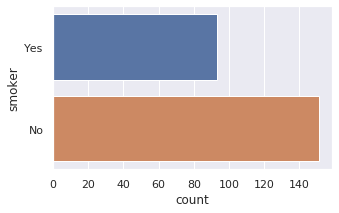

In [134]:
sns.countplot(data=tips, y="smoker") # placing the categories (smoker in this case) on y-axis makes the bars oriented horizontally
plt.show()

The below plot shows the number of customers split onto days the restaurant was open. The output is further broken down by the size of the party (colour coded - see the legend).

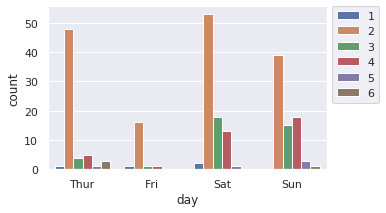

In [135]:
sns.countplot(data=tips, x="day", hue='size')
# Put the legend out of the figure, taken from https://stackoverflow.com/a/34579525
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

#### Barplots

The plots will be generated using the `seaborn.barplot()` function ([Seaborn docs](https://seaborn.pydata.org/generated/seaborn.barplot.html)).

Bar plot is a convenient tool for illustrating categorical data. The top (or length for horizontal bars) of the bar represents the _mean_ (in the below plots, default) of the category (feature). _Seaborn_ allows also to show _confidence interval_ of the feature. Again, the default value of 95% is used in the plots below.

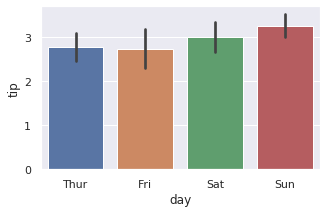

In [136]:
# Amount of tip on each day
# adapted from https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-1-29c9478a8700

sns.barplot(data = tips, x = 'day', y = 'tip')
plt.show()

Similar effect can be achieved using `seaborn.factorplot()` function. Below, we see amount of tip offered each day, further broken down on whether the client was a smoker or not.

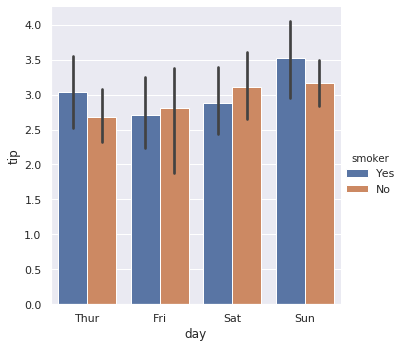

In [155]:
sns.factorplot("day", "tip", "smoker", kind="bar", data=tips)
plt.show()

#### Generating scatter plots  
Scatter plots allow for relating two (or more) variables. This section is based on official Seaborn [tutorial](https://seaborn.pydata.org/tutorial/relational.html).


In the below plots, function `seaborn.relplot()` is used, with the default kind of the plot (scatter). The values on x-axis are describe the total bill; y-axis - amount of tip received.

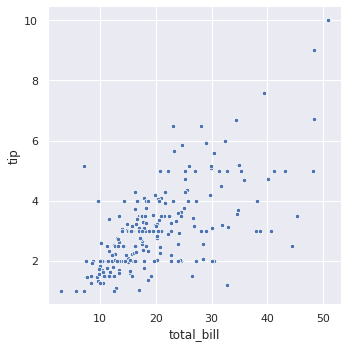

In [165]:
sns.relplot(data=tips, x="total_bill", y="tip", s=20);

Although the plot is 2D, a third variable (3rd dimension).
It can be represented by colour (as shown below) or by shape of the marker. 

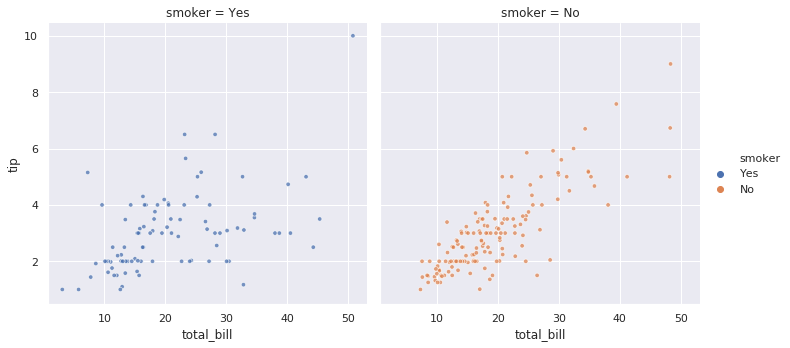

In [168]:
# Adding 3rd dimension, represented by colours.
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", col="smoker", alpha=0.75, s=20);

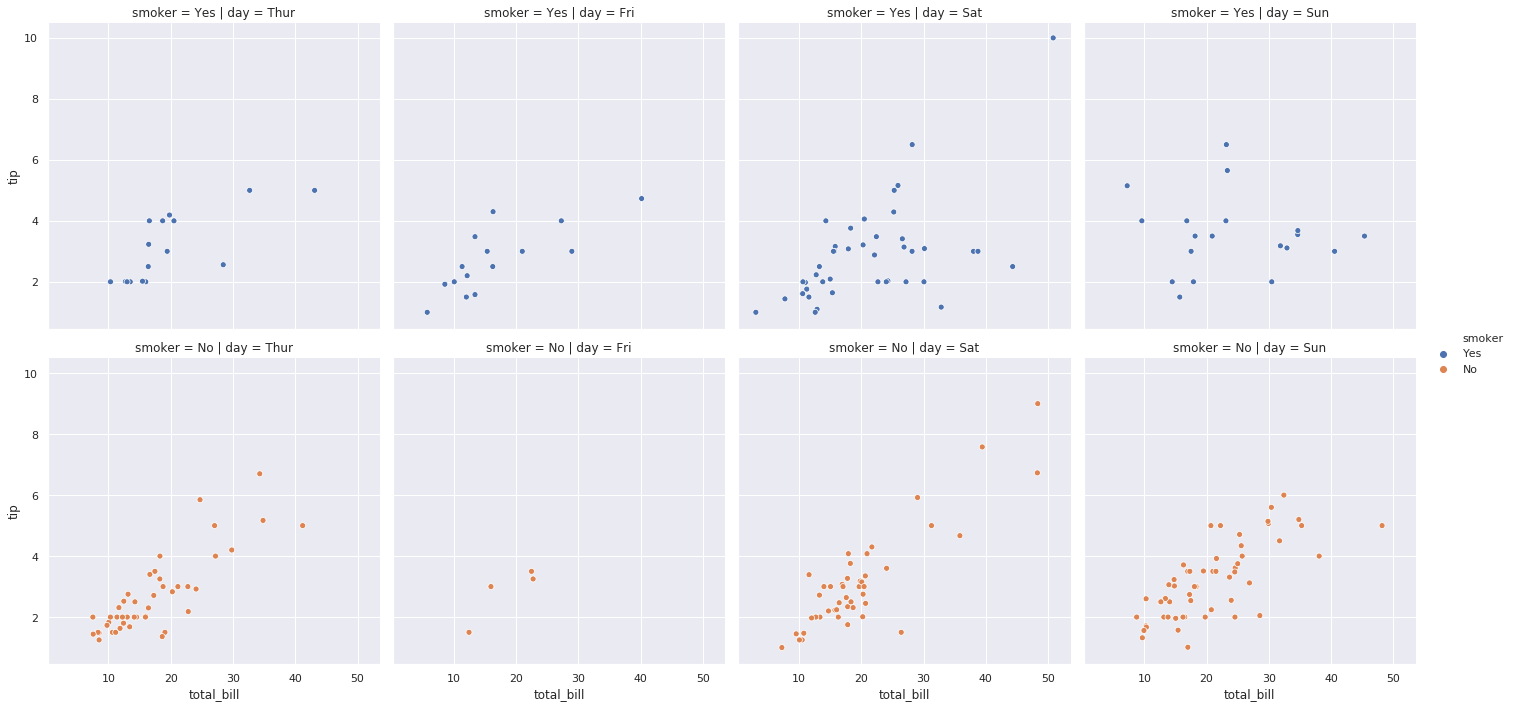

In [171]:
sns.relplot(data=tips, x="total_bill", y="tip", col="day", row="smoker", hue="smoker", marker='o')
plt.show()

In [ ]:
# 3-dimensional plot, where the 3rd axis is represented by shape of marker
sns.relplot(data=tips, x="total_bill", y="tip", style="smoker");

It is also possible to show 4 different set of variables (4 dimensions), by differenting the data points by colour and the shape of the markers at the same time.

In [ ]:
# 4-dimensional plot
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="time");

For numeric variables, a squential palette (shades of the same colour) apply. The default colour palette can be modified, as below.

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75");

Yet another way of adding extra dimension is by the means of size of the marker, as below.

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size");

The default marker sizes can be altered (as well as combined with previously discussed means of representing variables).

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size", sizes=(15, 200), hue="time", palette="ch:r=-.5,l=.75");

#### Violin plots

Another useful plot type is violin. Below is shown an example, showing tips amount distribution. Seaborn, by default shows also the median value (white dot in the middle) and percentiles (source: https://mode.com/blog/violin-plot-examples).

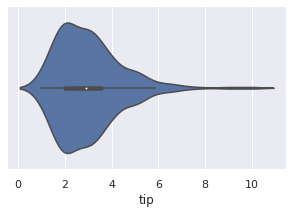

In [137]:
sns.violinplot(x = "tip", data=tips) # adapted from https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
plt.show()

### 3. Regression

In this section I will look at the initial hypothesis, that is: **What is the relationship (if any) between total bill and amount of tips**.

#### Total bill vs tips

Note: there seems to me no implication of the `time` (lunch and dinner) with respect to the relationship between total bill and tip. See below plot, where both _lunch_ and _dinner_ times seem to be uniformly distributed. Therefore, **this category will not be considered** in further analysis. A column exclusion adopted from [Stackoverflow entry](https://stackoverflow.com/a/29319200).

In [ ]:
tips = tips.drop(['time'], axis=1, inplace=False)

Once again, let's have a look at a plot showing _total bill_ (x-axes) against _tip_. This time, however, I am going to use Seaborne `jointplot()` function, which shows also the variables distribution.

In [ ]:
sns.jointplot(data=tips, data=tips, x="total_bill", y="tip", data=tips)

#### 3.1 Linear regression
This part is based on [Seaborn tutorial](https://seaborn.pydata.org/tutorial/regression.html)

Add regression line to the plot.

In [ ]:
sns.regplot(data=tips, x="total_bill", y="tip", data=tips);

More interesting plots can be produced with further variables discrimination, for example by whether the client was a smoker or not.

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", data=tips);

Below we see the relationship plotted separately for each day.

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="day", col="day", data=tips, height=4, aspect=.5)

### 3.2 k-nearest neighbours algorithm

Based on the Programming for Data Analysis, GMIT, lecture videos and [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/raw/master/pandas-with-iris.ipynb).  
Other consulted references:  
[Machine Learning Basics with the K-Nearest Neighbors Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)  
[K-Nearest Neighbors Algorithm Using Python](https://www.edureka.co/blog/k-nearest-neighbors-algorithm/)
[K-Nearest Neighbors Algorithm in Python and Scikit-Learn](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)

_k-nearest neighbours_ is a supervised machine learning algorithms. It is used to solve a classification problem. It produces a discreet output (that is: either this or that class (there may be more classes), but not something in between). 

#### Importing SciKit Learn Library

In [ ]:
import sklearn.neighbors as nei
import sklearn.model_selection as mod

In [ ]:
tips.head(2) # shape reminder: (244, 7)

#### A glimpse into plot.  
The below plot - relationship between tip size, total bill and the sex - is deemed the most suitable for the algorithm application. The other variables produce more fuzzy plots (a lot of overlapping data points).

In [ ]:
sns.pairplot(tips, hue="sex") 

Assigning `Inputs` and `Outputs`

In [ ]:
inputs = tips[['total_bill', 'tip']]
outputs = tips['sex']

Classifier `knn`

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5) # will consider 5 nearest neighbours

Applying `fit` function

In [ ]:
knn.fit(inputs, outputs)

Evaluation of the results

In [ ]:
(knn.predict(inputs) == outputs).sum() # Returns number of correctly recognised samples; total number of samples is 244

Training and testing data sub-sets.

The dataset is split randomly into:  
1) training (75% of entire dataset size, i.e. 183), and  
2) testing (25%, i.e. 61)

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.25)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

In [3]:
# knn.predict(inputs_test) == outputs_test

In [ ]:
answer = (knn.predict(inputs_test) == outputs_test).sum()
answer

Hence, the accuracy of the algorithm is the ratio of correctly recognised to actual number.

In [ ]:
print("%.02f" % ((answer/61) * 100), "%")

### 2.3 ANOVA

___
## Conclusion

___
## References